In [1]:
estilos = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
contextos = ['paper', 'notebook', 'talk', 'poster']
paletas = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']  # além das do matplotlib

In [2]:
import pandas as pd
import numpy as np

# Criando dados fictícios
np.random.seed(42)

# Produtos disponíveis
produtos = ['Smartphone', 'Tablet', 'Notebook', 'Smart TV']

# Regiões
regioes = ['Norte', 'Sul', 'Leste', 'Oeste']

# Geração de dados para trimestres, vendas e datas
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']
vendas = []
datas = pd.date_range(start='2023-01-01', end='2023-12-31', periods=len(trimestres) * len(regioes) * len(produtos))

for i, trimestre in enumerate(trimestres):
    for regiao in regioes:
        for produto in produtos:
            vendas.append({
                'Data': datas[i].date(),
                'Trimestre': trimestre,
                'Região': regiao,
                'Produto': produto,
                'Vendas': np.random.randint(100, 1000),
                'ID_Cliente': np.random.randint(1, 100),
                'ID_Compra': np.random.randint(1000, 2000),
                'Meses_Contrato': np.random.randint(6, 24),
                'Valor_Mensal': np.random.uniform(50, 200),
            })

dados_vendas = pd.DataFrame(vendas)
dados_vendas['Total_Gasto'] = dados_vendas['Meses_Contrato'] * dados_vendas['Valor_Mensal']
dados_vendas['Churn'] = 0
dados_vendas.loc[dados_vendas['Meses_Contrato'] >= 6, 'Churn'] = np.random.choice([0, 1], size=dados_vendas[dados_vendas['Meses_Contrato'] >= 6].shape[0], p=[0.5, 0.5])

# Salvar os dados em um arquivo CSV
dados_vendas.to_csv('dados_vendas_completo.csv', index=False)

# Lendo o arquivo CSV recém-criado
Dados = pd.read_csv('dados_vendas_completo.csv')
display(Dados.head())


,Data,Trimestre,Região,Produto,Vendas,ID_Cliente,ID_Compra,Meses_Contrato,Valor_Mensal,Total_Gasto,Churn
0,2023-01-01,Q1,Norte,Smartphone,202,52,1860,20,159.799091,3195.981825,1
1,2023-01-01,Q1,Norte,Tablet,800,21,1614,16,118.887334,1902.197341,0
2,2023-01-01,Q1,Norte,Notebook,472,24,1130,7,158.299816,1108.098711,1
3,2023-01-01,Q1,Norte,Smart TV,513,38,1385,6,95.636336,573.818019,1
4,2023-01-01,Q1,Sul,Smartphone,121,89,1560,15,56.999849,854.997742,1


In [3]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data            64 non-null     object 
 1   Trimestre       64 non-null     object 
 2   Região          64 non-null     object 
 3   Produto         64 non-null     object 
 4   Vendas          64 non-null     int64  
 5   ID_Cliente      64 non-null     int64  
 6   ID_Compra       64 non-null     int64  
 7   Meses_Contrato  64 non-null     int64  
 8   Valor_Mensal    64 non-null     float64
 9   Total_Gasto     64 non-null     float64
 10  Churn           64 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 5.6+ KB


In [4]:
Dados['Data'] = pd.to_datetime(Dados['Data'],format='%Y-%m-%d')
Dados['Ano De Compra'] =  Dados['Data'].dt.year


In [5]:
Dados_numericos = Dados.select_dtypes(include='number').columns
Dados_categoricos =  Dados.select_dtypes(exclude='number').columns
display(Dados_categoricos)
display(Dados_numericos)

Index(['Data', 'Trimestre', 'Região', 'Produto'], dtype='object')

Index(['Vendas', 'ID_Cliente', 'ID_Compra', 'Meses_Contrato', 'Valor_Mensal',
       'Total_Gasto', 'Churn', 'Ano De Compra'],
      dtype='object')

In [6]:
Dados.set_index('Data',drop=True)

,Trimestre,Região,Produto,Vendas,ID_Cliente,ID_Compra,Meses_Contrato,Valor_Mensal,Total_Gasto,Churn,Ano De Compra
Data,,,,,,,,,,,
2023-01-01,Q1,Norte,Smartphone,202,52,1860,20,159.799091,3195.981825,1,2023
2023-01-01,Q1,Norte,Tablet,800,21,1614,16,118.887334,1902.197341,0,2023
2023-01-01,Q1,Norte,Notebook,472,24,1130,7,158.299816,1108.098711,1,2023
2023-01-01,Q1,Norte,Smart TV,513,38,1385,6,95.636336,573.818019,1,2023
2023-01-01,Q1,Sul,Smartphone,121,89,1560,15,56.999849,854.997742,1,2023
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,Q4,Leste,Smart TV,500,33,1687,17,126.322112,2147.475896,0,2023
2023-01-18,Q4,Oeste,Smartphone,569,22,1749,11,196.833929,2165.173216,1,2023
2023-01-18,Q4,Oeste,Tablet,662,54,1775,7,102.511761,717.582328,0,2023


/home/viniciusmonteiropina/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


array([[<Axes: title={'center': 'Vendas'}>,
        <Axes: title={'center': 'ID_Cliente'}>,
        <Axes: title={'center': 'ID_Compra'}>],
       [<Axes: title={'center': 'Meses_Contrato'}>,
        <Axes: title={'center': 'Valor_Mensal'}>,
        <Axes: title={'center': 'Total_Gasto'}>],
       [<Axes: title={'center': 'Churn'}>,
        <Axes: title={'center': 'Ano De Compra'}>, <Axes: >]],
      dtype=object)

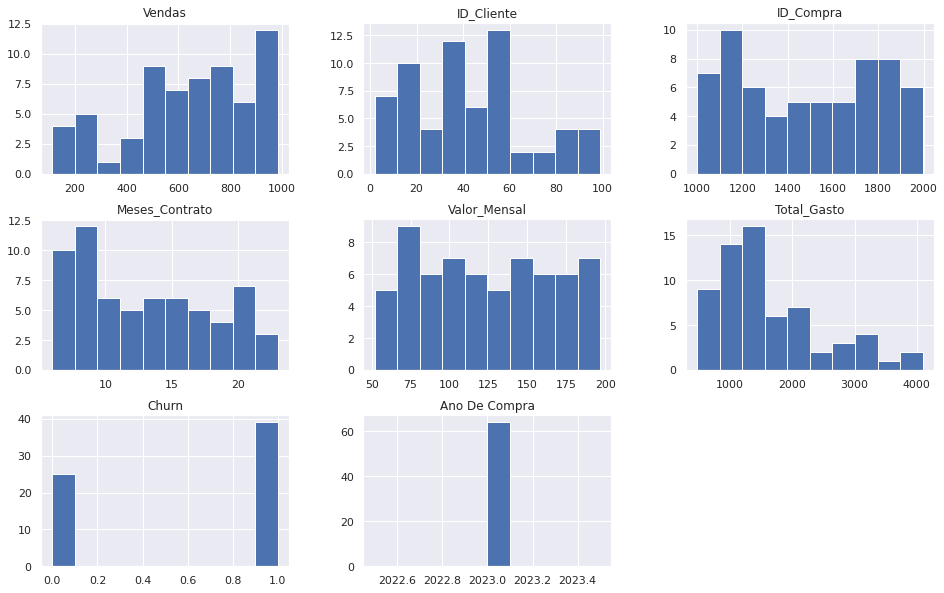

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='dark',context='notebook')
Dados[Dados_numericos].hist(figsize=(16, 10))

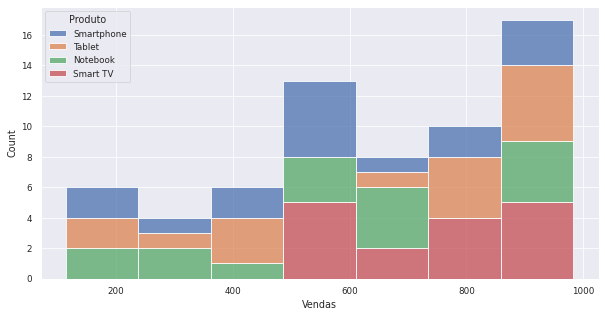

In [8]:
plt.figure(figsize=(10,5))
sns.set_theme(style='darkgrid', palette='deep', context='paper')
sns.histplot(x='Vendas',hue='Produto',data=Dados,multiple='stack');

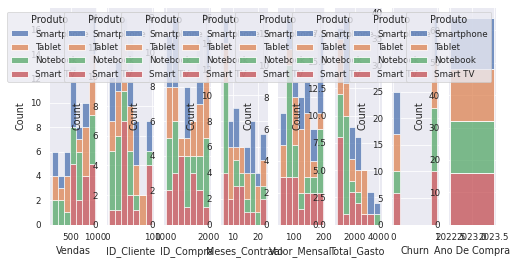

In [9]:
fig ,eixos = plt.subplots(nrows=1,ncols=8,figsize=(8,4))

for i,coluna in enumerate(Dados_numericos):
    sns.histplot(x=coluna,hue='Produto',data=Dados,multiple='stack',ax=eixos[i]);
plt.show()  

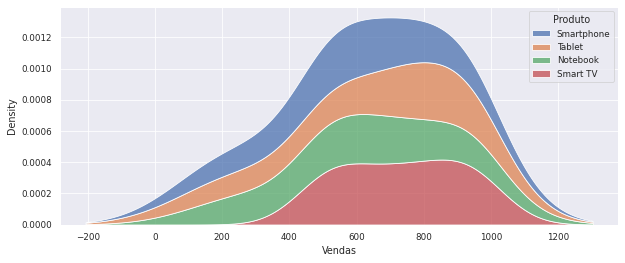

In [10]:
plt.figure(figsize=(10, 4))
figure = sns.kdeplot(x='Vendas',hue='Produto',multiple='stack',data=Dados)

<Figure size 720x288 with 0 Axes>

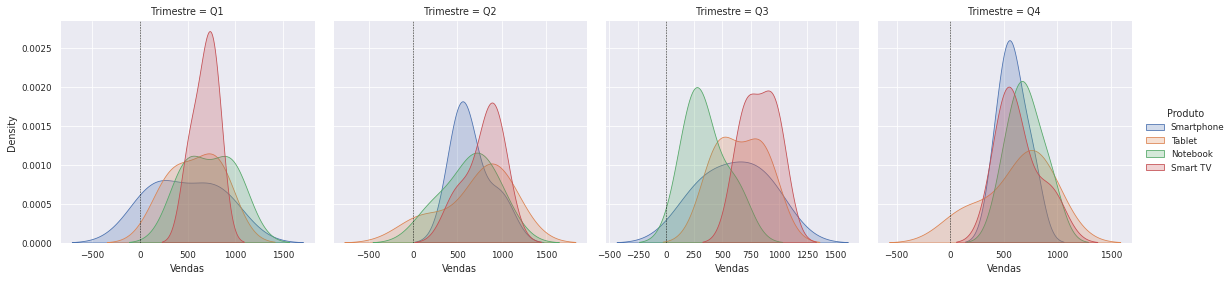

In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seus dados

plt.figure(figsize=(10, 4))
g = sns.FacetGrid(Dados, col="Trimestre", hue="Produto", col_wrap=4, height=4, sharex=False)
g.map(sns.kdeplot, "Vendas", fill=True)

# Adicionando a linha vertical para destacar o eixo X
for ax in g.axes:
    ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

g.add_legend()

plt.show()


<Figure size 1080x360 with 0 Axes>

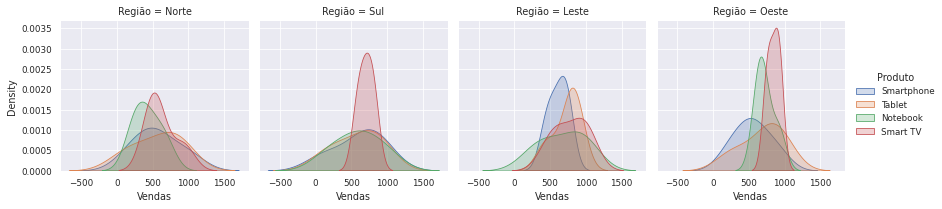

In [12]:
plt.figure(figsize=(15,5))
g =  sns.FacetGrid( col='Região', hue='Produto',data=Dados)
g.map(sns.kdeplot, "Vendas", fill=True)

g.add_legend()

plt.show()

<Figure size 1080x360 with 0 Axes>

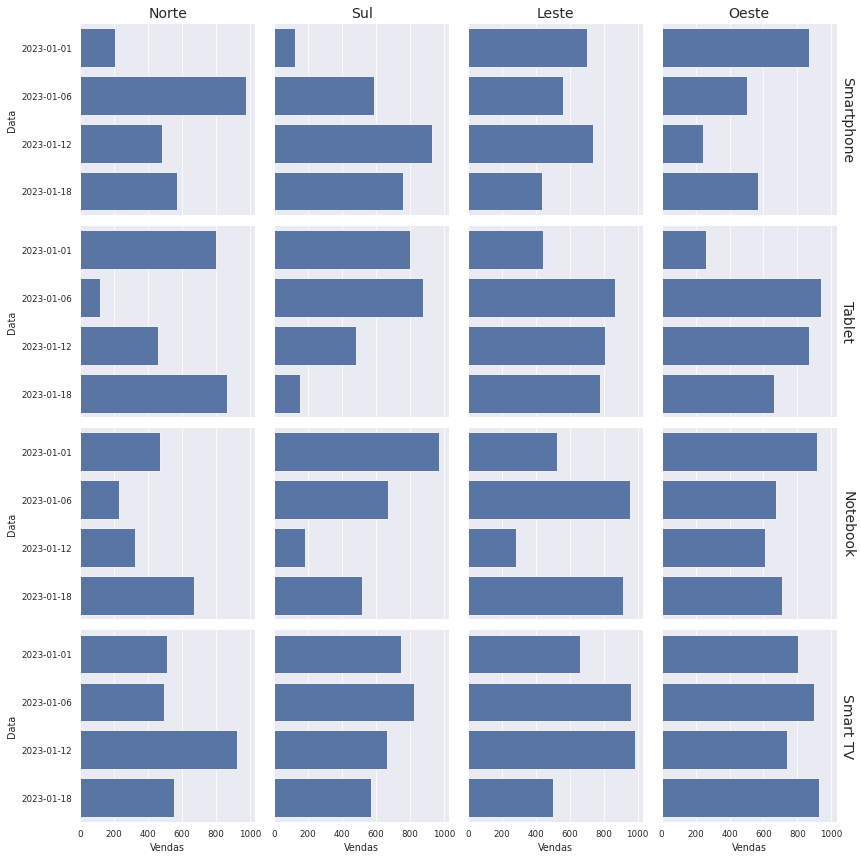

In [13]:
plt.figure(figsize=(15, 5))

# Criando o FacetGrid com margens maiores entre os títulos
g = sns.FacetGrid(Dados, row='Produto', col='Região', margin_titles=True)
g.map_dataframe(sns.barplot, x='Vendas', y='Data')

# Ajustando os títulos dos subplots
g.set_titles(row_template='{row_name}', col_template='{col_name}', size=14)

plt.show()


<Figure size 1080x360 with 0 Axes>

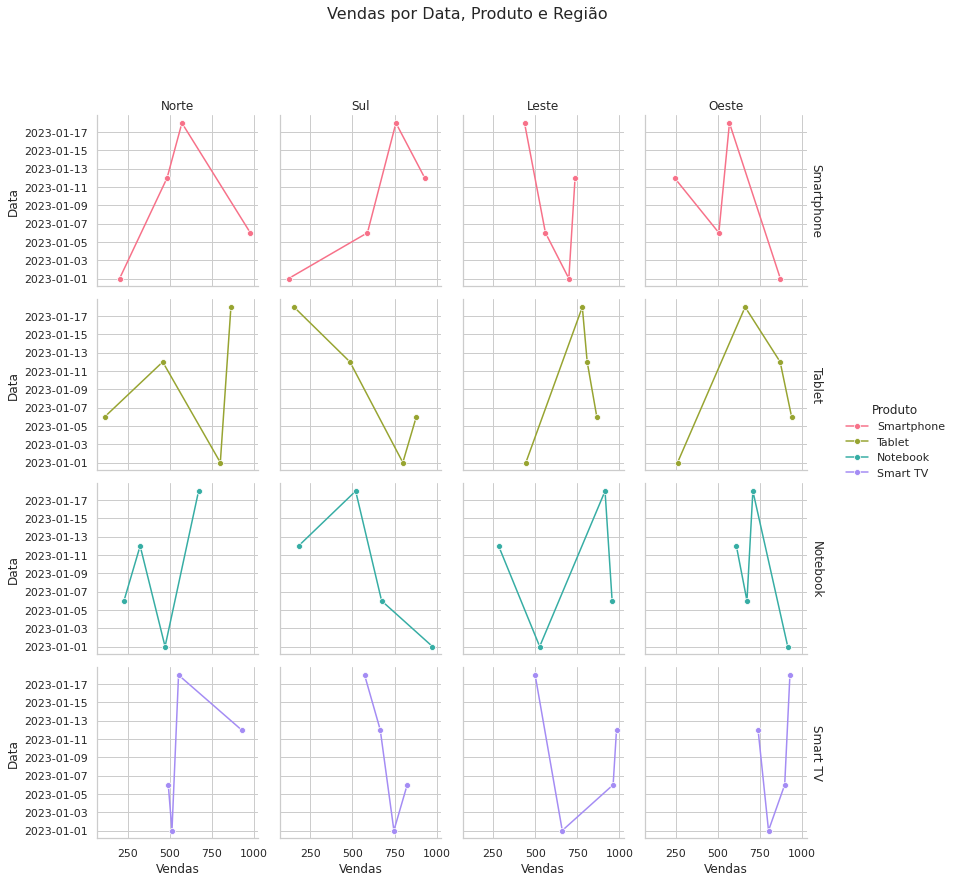

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo um estilo mais agradável
sns.set_theme(style='whitegrid')

# Personalizando cores
cores = sns.color_palette('husl', n_colors=len(Dados['Produto'].unique()))

# Criando o FacetGrid com lineplot
plt.figure(figsize=(15, 5))
g = sns.FacetGrid(Dados, row='Produto', col='Região', hue='Produto', margin_titles=True, palette=cores)
g.map_dataframe(sns.lineplot, x='Vendas', y='Data', marker='o')

# Adicionando título ao FacetGrid
g.fig.suptitle('Vendas por Data, Produto e Região', y=1.02, fontsize=16)

# Personalizando rótulos e labels
g.set_axis_labels('Vendas', 'Data')
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Ajustando layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
g.add_legend()
plt.show()




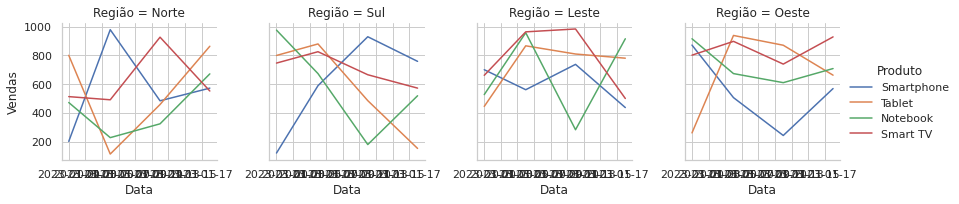

In [15]:

g = sns.FacetGrid(Dados, col='Região', hue='Produto')
g.map_dataframe(sns.lineplot, x='Data',y='Vendas')
g.add_legend()
plt.show()


/tmp/ipykernel_15063/2682243350.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=coluna,hue='Produto',data=Dados,ax=eixos[i],fill=True);


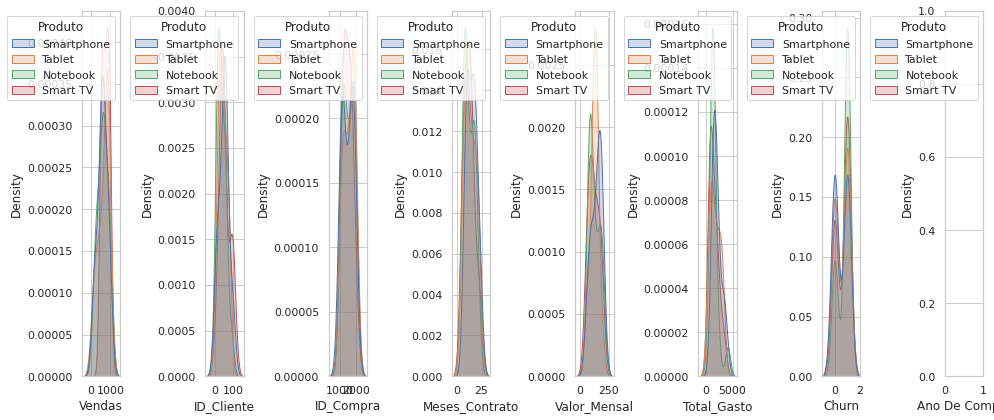

In [16]:
fig ,eixos = plt.subplots(nrows=1,ncols=8,figsize=(14,6),tight_layout=True)

for i,coluna in enumerate(Dados_numericos):
    sns.kdeplot(x=coluna,hue='Produto',data=Dados,ax=eixos[i],fill=True);
plt.show()  

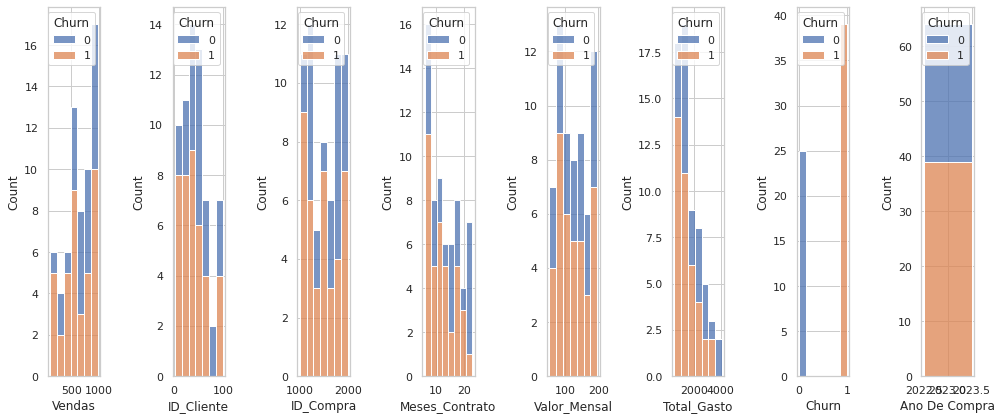

In [17]:
fig ,eixos = plt.subplots(nrows=1,ncols=8,figsize=(14,6),tight_layout=True)

for i,coluna in enumerate(Dados_numericos):
    sns.histplot(x=coluna,hue='Churn',data=Dados,ax=eixos[i],multiple='stack');
plt.show()  

/tmp/ipykernel_15063/2724180732.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  k = sns.kdeplot(x=coluna, hue='Churn', data=Dados, fill=True, ax=axs[i])
/tmp/ipykernel_15063/2724180732.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  k = sns.kdeplot(x=coluna, hue='Churn', data=Dados, fill=True, ax=axs[i])


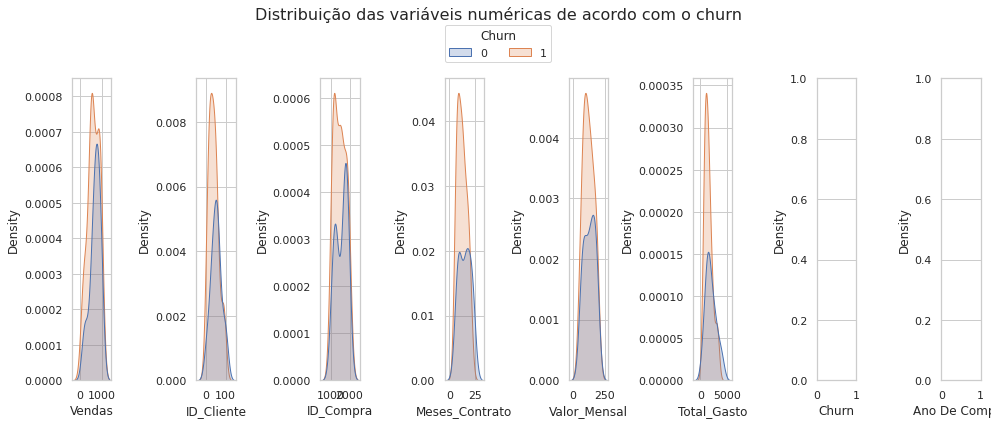

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(14, 6), tight_layout=True)

for i, coluna in enumerate(Dados_numericos):
    k = sns.kdeplot(x=coluna, hue='Churn', data=Dados, fill=True, ax=axs[i])
    legend = axs[i].get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.95))
fig.suptitle('Distribuição das variáveis numéricas de acordo com o churn\n\n', fontsize=16)

plt.show() 


#  BANCO DE DADOS DE CHURN HASHTAG


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Data = pd.read_csv('churn_clientes.csv')
display(Data)

Data.info()
Numeric_Data = Data.select_dtypes(include='number').columns
Categoric_Data =  Data.select_dtypes(exclude='number').columns
display(Numeric_Data)

Categoric_Data = Categoric_Data.drop(['churn'])
display(Categoric_Data)


,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Masculino,Não,Sim,Sim,24,Sim,Sim,DSL,Sim,...,Sim,Sim,Sim,Sim,Anual,Sim,Cheque,84.80,1990.50,Não
7039,2234-XADUH,Feminino,Não,Sim,Sim,72,Sim,Sim,Fibra optica,Não,...,Sim,Não,Sim,Sim,Anual,Sim,Cartao de credito,103.20,7362.90,Não
7040,4801-JZAZL,Feminino,Não,Sim,Sim,11,Não,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.60,346.45,Não
7041,8361-LTMKD,Masculino,Sim,Sim,Não,4,Sim,Sim,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Cheque,74.40,306.60,Sim


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   genero                        7043 non-null   object 
 2   idoso                         7043 non-null   object 
 3   tem_parceiro                  7043 non-null   object 
 4   tem_dependentes               7043 non-null   object 
 5   meses_na_empresa              7043 non-null   int64  
 6   servico_telefone              7043 non-null   object 
 7   multiplas_linhas              7043 non-null   object 
 8   servico_internet              7043 non-null   object 
 9   servico_seguranca             7043 non-null   object 
 10  servico_backup                7043 non-null   object 
 11  servico_protecao_equipamento  7043 non-null   object 
 12  servico_suporte_tecnico       7043 non-null   object 
 13  str

Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')

Index(['id_cliente', 'genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')

array([[<Axes: title={'center': 'meses_na_empresa'}>,
        <Axes: title={'center': 'valor_mensal'}>],
       [<Axes: title={'center': 'total_gasto'}>, <Axes: >]], dtype=object)

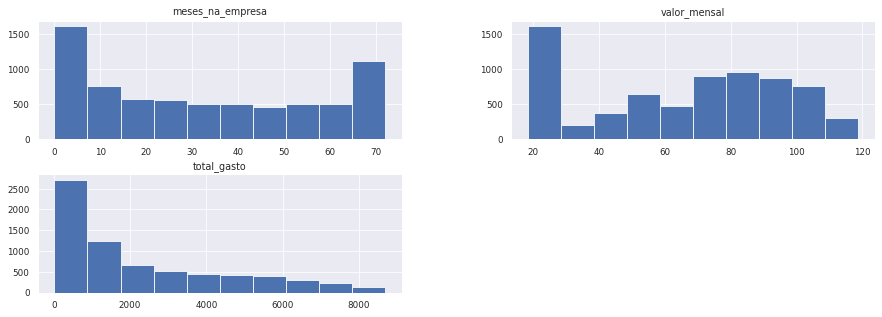

In [20]:
# Data[Categoric_Data]

# Data[Numeric_Data].corr()
sns.set_theme(style='dark',context='paper')
Data.hist(figsize=(15,5))



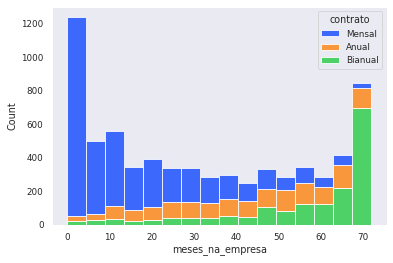

In [21]:
sns.set_theme(style='dark',context='paper',palette='bright')
sns.histplot(x='meses_na_empresa',hue='contrato',multiple='stack',data=Data);


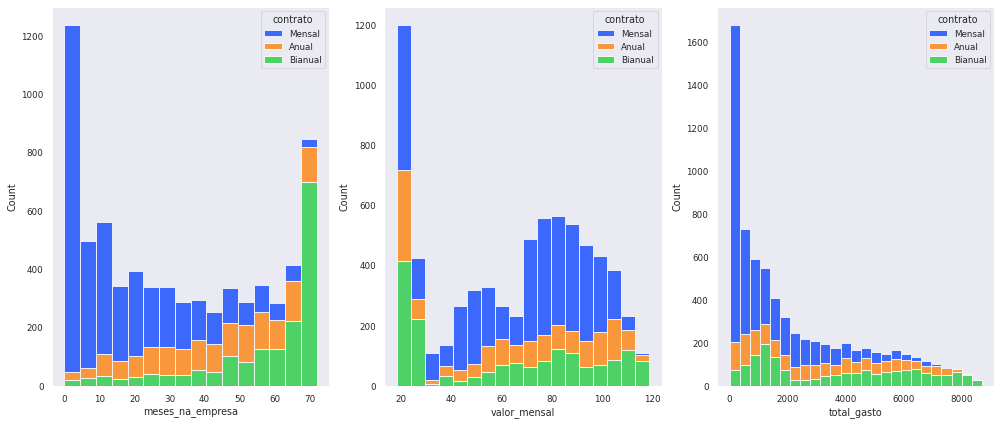

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)
sns.set_theme(style='darkgrid', palette='bright', context='paper')
for i, columns in enumerate(Numeric_Data):
    sns.histplot(x=columns,hue='contrato',multiple='stack',data=Data,ax=axes[i]);
    
    

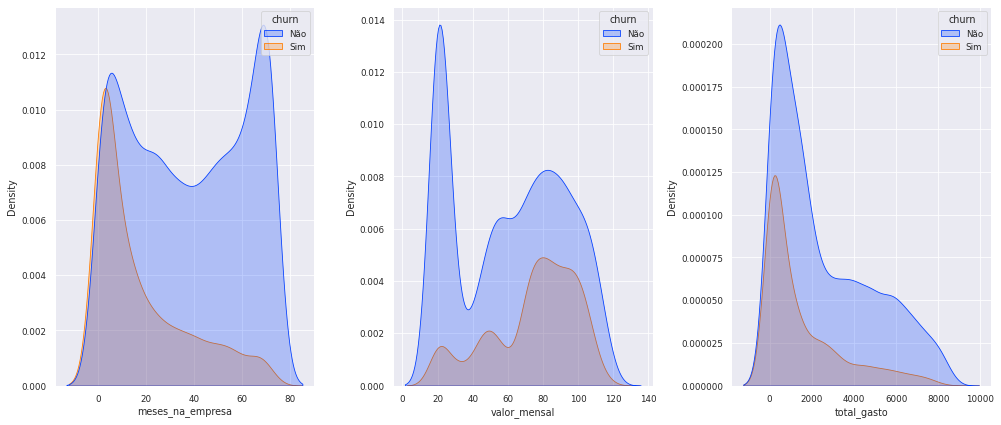

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

sns.set_theme(style='darkgrid', palette='bright', context='paper')

for i, columns  in enumerate(Numeric_Data):
    sns.kdeplot(x=columns,hue='churn',data=Data,fill=True,ax=axes[i]);
    

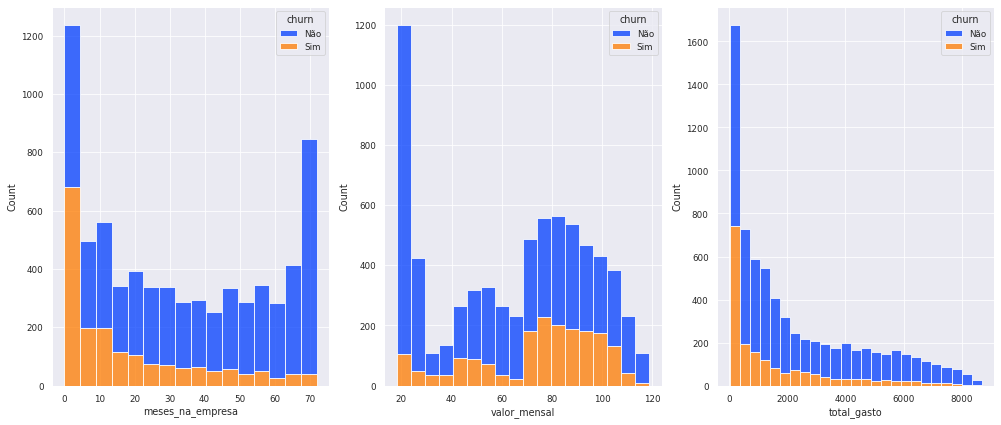

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

sns.set_theme(style='darkgrid', palette='bright', context='paper')

for i, columns  in enumerate(Numeric_Data):
    sns.histplot(x=columns,hue='churn',data=Data,multiple='stack',ax=axes[i]);
    

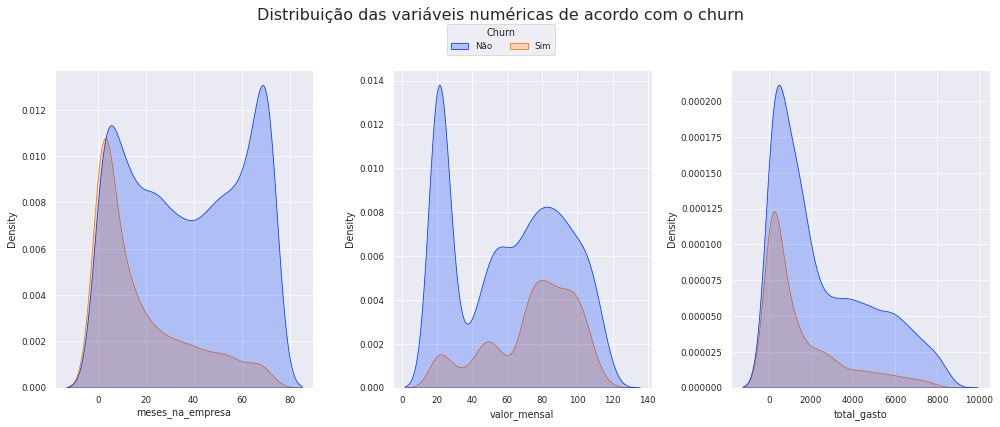

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), tight_layout=True)

for i, columns in enumerate(Numeric_Data):
    k = sns.kdeplot(x=columns, hue='churn', data=Data, fill=True, ax=axes[i])
    legend = axes[i].get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.95))
fig.suptitle('Distribuição das variáveis numéricas de acordo com o churn\n\n', fontsize=16)

plt.show() 


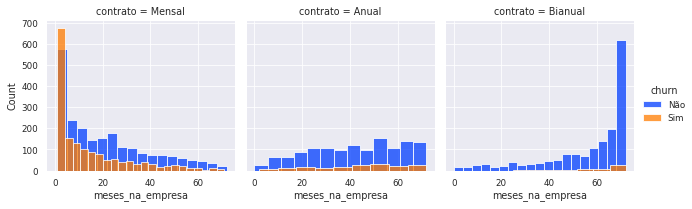

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Definindo um estilo mais agradável
# sns.set_theme(style='whitegrid')

# # Personalizando cores
# cores = sns.color_palette('husl', n_colors=len(Dados['Produto'].unique()))

# # Criando o FacetGrid com lineplot
# plt.figure(figsize=(15, 5))
# g = sns.FacetGrid(Dados, row='Produto', col='Região', hue='Produto', margin_titles=True, palette=cores)
# g.map_dataframe(sns.lineplot, x='Vendas', y='Data', marker='o')

# # Adicionando título ao FacetGrid
# g.fig.suptitle('Vendas por Data, Produto e Região', y=1.02, fontsize=16)

# # Personalizando rótulos e labels
# g.set_axis_labels('Vendas', 'Data')
# g.set_titles(row_template='{row_name}', col_template='{col_name}')

# # Ajustando layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# g.add_legend()
# plt.show()

g = sns.FacetGrid(Data, col='contrato', hue='churn')
g.map_dataframe(sns.histplot, x='meses_na_empresa')
g.add_legend()
plt.show()


In [27]:
Data.describe()

,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


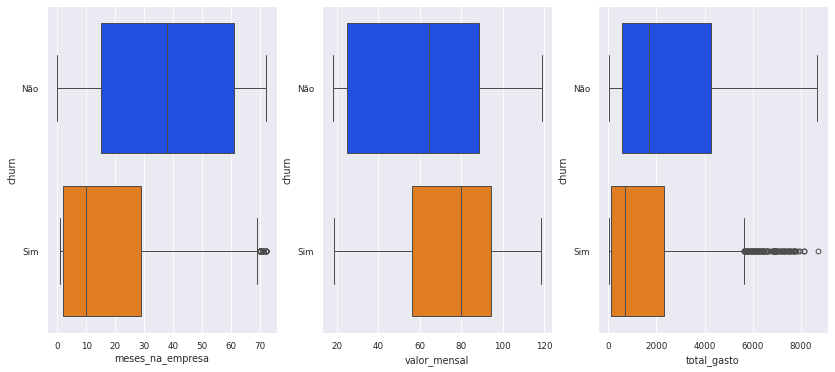

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6),)
for i, columns in enumerate(Numeric_Data):
    sns.boxplot(x=columns,y='churn', data=Data, ax=axes[i],hue='churn')
    
plt.show()